# Final project Probability - Sandy Sanjaya Awaluddin

The project aims to analyze variables related to cmedical charges of insuree. There are 5 features provided: age, sex, location, number of children, BMI, and smoking informations.

In [10]:
import pandas as pd
import numpy as np
import scipy.stats as stat

import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

# apply some cool styling
plt.style.use("ggplot")
rcParams['figure.figsize'] = (12,  6)

# Sanity check 
Data is obtained from Pacmann course. Sanity check is done in checking the integrity of data specifically on NaN values, duplicates, and distribution

In [3]:
# Read the csv file
df = pd.read_csv('insurance.csv')

# Check for dimension and size 
print("Number of rows = " + str(df.shape[0]))
print("Number of columns = " + str(df.shape[1]))

# Check for NaN Value 
df.info()

Number of rows = 1338
Number of columns = 7
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


From the code above, we can see that there are null values or empty row in the DataFrame. 
The duplicates are later checked as follows

## Duplicates Check

In [4]:
df[df.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


The data seem to have a duplicate in one of the rows. This significies the importance of having ID number in surveys and data acquisitions. Understanding there's only one duplicate row out of 1338 rows, the data is kept since it is deemed insignificant to the overaching trends

# 1. Analisa Descriptive Statistic

In [5]:
df_active = df[df['smoker']=='yes']
df_inactive = df[df['smoker']=='no']

Question to answer:
1. Rata-rata umur pengguna
2. Rata-rata nilai BMI dari pengguna yang merokok
3. Berapa rata rata umur pada data tersebut?
4. Berapa rata rata nilai BMI dari yang merokok?
5. Apakah variansi dari data charges perokok dan non perokok sama?
6. Apakah rata rata umur perempuan dan laki-laki yang merokok sama?
7. Mana yang lebih tinggi, rata rata tagihan kesehatan perokok atau non merokok?
8. Mana yang lebih tinggi, rata rata tagihan kesehatan perokok yang BMI nya diatas 25
atau non perokok yang BMI nya diatas 25
9. BMI mana yang lebih tinggi, seseorang laki-laki atau perempuan?
10. BMI mana yang lebih tinggi, seseorang perokok atau non perokok?

In [6]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [7]:
# Calculating the average age of active smoker
avg_active_age = df.groupby('smoker')['age'].mean()['yes']
print("1. Average Age of Active Smoker: "+f'{avg_active_age:.3f}')

# Calculating the average bmi of active smoker
avg_active_bmi = df.groupby('smoker')['bmi'].mean()['yes']
print("2. Average BMI of Active Smoker: "+f'{avg_active_bmi:.3f}')

# Calculating the average age 
avg_age = df['age'].mean()
print("3. Average age in dataset: "+f'{avg_age:.3f}')
print("4. Question is similar to Question #2")
      
# Calculating the variance of charges
var_charges = df.groupby('smoker')['charges'].var()
print("5. Variance of charges: "+ str(var_charges))
print("Variance of smoker [yes] is higher tha non-smoker [no]")

# Calculating average of of active smoker divided by gender
avg_active_age_gender = df_active.groupby('sex')['age'].mean()
print("6. Age of smoker per gender: "+ str(avg_active_age_gender))
print("There is a small difference between the age of male/female smoker."+\
      " It could potentially be an outlier which can be discovered by adding more data,"\
      "but from the dataset, male smokers are younger than female smoker")


# Calculating average of chargs between smoker/non-smoker
avg_charges_smoker = df_active.groupby('smoker')['charges'].mean()
print("7. Charges per smoking habits: "+ str(avg_charges_smoker))



# Categorizing BMI 
df_bmi25 = df.copy()
df_act_Hbmi25 = df[(df['smoker']=='yes') & (df['bmi']>25)]
charge_act_Hbmi25 = df_act_Hbmi25['charges'].mean()
df_pas_Lbmi25 = df[(df['smoker']=='no') & (df['bmi']<25)]
charge_pas_Lbmi25 = df_pas_Lbmi25['charges'].mean()
print("8. Charges for active smoker with BMI>25 ["+f'{charge_act_Hbmi25:.3f}'\
      +"] is higher than charges for non-smoker with BMI<25 ["+f'{charge_pas_Lbmi25:.3f}'+']')

# Calculating the bmi based on sex
bmi_sex = df.groupby('sex')['bmi'].mean()
print("9. Male has higher bmi than Female in the dataset: "+ str(bmi_sex))

# Calculating the bmi based on smoker/non-smoker
bmi_smoker = df.groupby('smoker')['bmi'].mean()
print("10. Smoker and non-smoker have relatively similar bmi "+ str(bmi_smoker))




1. Average Age of Active Smoker: 38.515
2. Average BMI of Active Smoker: 30.708
3. Average age in dataset: 39.207
4. Question is similar to Question #2
5. Variance of charges: smoker
no     3.592542e+07
yes    1.332073e+08
Name: charges, dtype: float64
Variance of smoker [yes] is higher tha non-smoker [no]
6. Age of smoker per gender: sex
female    38.608696
male      38.446541
Name: age, dtype: float64
There is a small difference between the age of male/female smoker. It could potentially be an outlier which can be discovered by adding more data,but from the dataset, male smokers are younger than female smoker
7. Charges per smoking habits: smoker
yes    32050.231832
Name: charges, dtype: float64
8. Charges for active smoker with BMI>25 [35116.910] is higher than charges for non-smoker with BMI<25 [7515.709]
9. Male has higher bmi than Female in the dataset: sex
female    30.377749
male      30.943129
Name: bmi, dtype: float64
10. Smoker and non-smoker have relatively similar bmi smok

# 2. Analisa Variable Kategorik (PMF)

Beberapa hal yang dapat Anda jawab adalah
1. Gender mana yang memiliki tagihan paling tinggi?
2. Distribusi peluang tagihan di tiap-tiap region
3. Apakah setiap region memiliki proporsi data banyak orang yang sama?
4. Mana yang lebih tinggi proporsi perokok atau non perokok?
5. Berapa peluang seseorang tersebut adalah perempuan diketahui dia adalah perokok?
6. Berapa peluang seseorang tersebut adalah laki-laki diketahui dia adalah perokok?
7. Bagaimana bentuk distribusi peluang besar tagihan dari tiap-tiap region?

In [173]:
# Calculating the average age of active smoker
gender_charges = df.groupby('sex')['charges'].mean()
print("1. Male have higher charges than Female "+str(gender_charges))

1. Male have higher charges than Female sex
female    12569.578844
male      13956.751178
Name: charges, dtype: float64


In [175]:
# Calculating the average age of active smoker
region_charges = df.groupby('region')['charges'].mean()
print("2. Distribution of charges across region "+str(region_charges))

2. Distribution of charges across region region
northeast    13406.384516
northwest    12417.575374
southeast    14735.411438
southwest    12346.937377
Name: charges, dtype: float64


In [181]:
# Calculating the average age of active smoker
len_region = df.groupby('region')['charges'].size().reset_index(name='count of people')
print("3. Number of people per region :")
len_region

3. Number of people per region :


,region,count of people
0,northeast,324
1,northwest,325
2,southeast,364
3,southwest,325


In [190]:
# Calculating the average age of active smoker
len_smoker = df.groupby('smoker').size().reset_index(name='# of people')
print("4. Number of smoker ['yes'] and non-smoker [no]")
print(len_smoker)

3. Number of smoker ['yes'] and non-smoker [no]
  smoker  # of people
0     no         1064
1    yes          274


In [194]:
p_fe_smoke = len(df[(df['sex']=='female') & (df['smoker']=='yes')])/len(df)
print('5. Berapa peluang seseorang tersebut adalah perempuan diketahui dia adalah perokok? '+f'{p_fe_smoke:.3f}')

5. Berapa peluang seseorang tersebut adalah perempuan diketahui dia adalah perokok? 0.212


In [195]:
p_ma_smoke = len(df[(df['sex']=='male') & (df['smoker']=='yes')])/len(df)
print('6. Berapa peluang seseorang tersebut adalah laki-laki diketahui dia adalah perokok? '+f'{p_ma_smoke:.3f}')

6. Berapa peluang seseorang tersebut adalah laki-laki diketahui dia adalah perokok? 0.119


7. Bagaimana bentuk distribusi peluang besar tagihan dari tiap-tiap region?


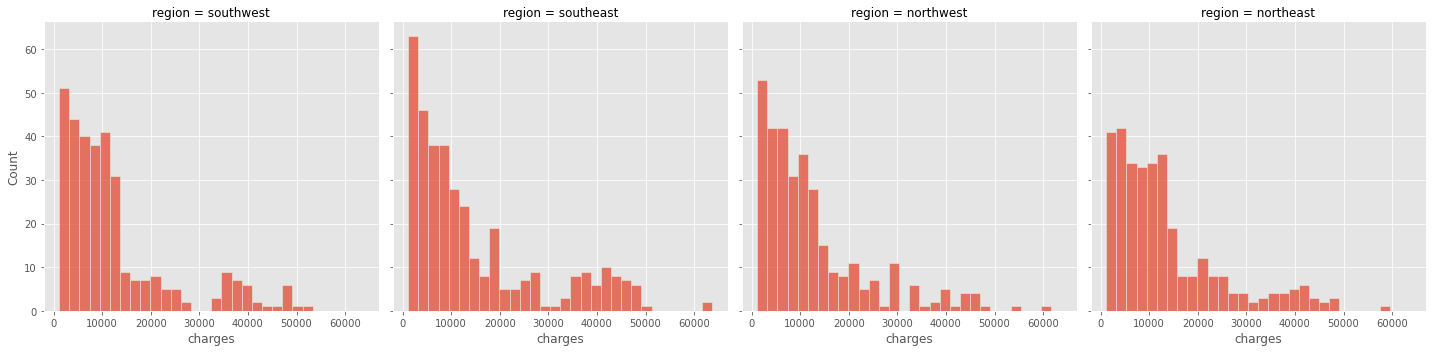

In [206]:
print('7. Bagaimana bentuk distribusi peluang besar tagihan dari tiap-tiap region?')
sns.displot(df, x="charges", col='region')

# 3. Analisa Variable Kontinu

Anda bisa memilih 2 pertanyaan dibawah ini untuk pengecekan
kondisi pada data.
1. Mana yang lebih mungkin terjadi:<br>
a. Seseorang dengan BMI diatas 25 mendapatkan tagihan kesehatan diatas 16.7k, atau <br>
b. Seseorang dengan BMI dibawah 25 mendapatkan tagihan kesehatan diatas 16.7k

2. Mana yang lebih mungkin terjadi:<br>
a. Seseorang perokok dengan BMI diatas 25 mendapatkan tagihan kesehatan diatas 16.7k, atau<br>
b. Seseorang non perokok dengan BMI diatas 25 mendapatkan tagihan kesehatan
diatas 16.7k

Probability is represented as p with event 1a as p_1a. The same pattern is used for all events

In [160]:
p_1a = len(df[(df['bmi']>25) & (df['charges']>16700)])/len(df)
p_1b = len(df[(df['bmi']<25) & (df['charges']>16700)])/len(df)
print('It is more possible that someone with a bmi>25 to have charges more than 16.7k ['+f'{p_1a:.3f}'\
      +'] rather than someone with a bmi<25['+f'{p_1b:.3f}'+']')

It is more possible that someone with a bmi>25 to have charges more than 16.7k [0.212] rather than someone with a bmi<25[0.038]


In [159]:
p_2a = len(df[(df['smoker']=='yes') & (df['bmi']>25) & (df['charges']>16700)])/len(df)
p_2b = len(df[(df['smoker']=='no')& (df['bmi']>25) & (df['charges']>16700)])/len(df)
print('It is more possible that a smoker with a bmi<25 to have charges more than 16.7k ['+f'{p_2a:.3f}'\
      +'] rather than non-smoker with a bmi>25['+f'{p_2b:.3f}'+']')

It is more possible that a smoker with a bmi<25 to have charges more than 16.7k [0.161] rather than non-smoker with a bmi>25[0.051]


# 4. Analisa Korelasi Variabel

In [210]:
corr = df.corr()
corr.style.background_gradient()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


# 5. Hypothesis testing

Three out of five hypothesis is tested using ttest. The hypothesis are:
1. Charges for smoker is higher than non-smoker
2. Proportion of smoker is higher in men than women
3. Charges variances is same between smoker and non-smoker
4. Charges for BMI>25 is higher than Charges for BMI<25
5. Charges for men is higher than women

# Question 1: Charges for smoker are higher than non-smoker

$$ \mu_1 = \text{Charges for smoker} $$
$$ \mu_2 = \text{Charges for non-smoker}$$
$$H_0: \mu_1 \leq  \mu_2 \text{ Charges for smoker is less than or equal to non-smoker}$$
$$H_1: \mu_1 >  \mu_2 \text{ Charges for smoker is higher than non-smoker}$$

Since the variance and size is of smoker and non smoker is different we would use the welch ttest rather than the usual student ttest

In [88]:
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

The hypothesis test are done using T-test considering that the standard deviation to the population are not known and only the samples are given in a form of a dataset. 
Understanding the number of samples are not equal between smoker and non-smoker, Welcht T-Test rather than the usual Student T-Test.

In [89]:
alpha=0.05
t, p = stat.ttest_ind(df_active['charges'], df_inactive['charges'], equal_var=False, alternative="greater")
print("P-value =" + str(p))

P-value =2.94473222335849e-103


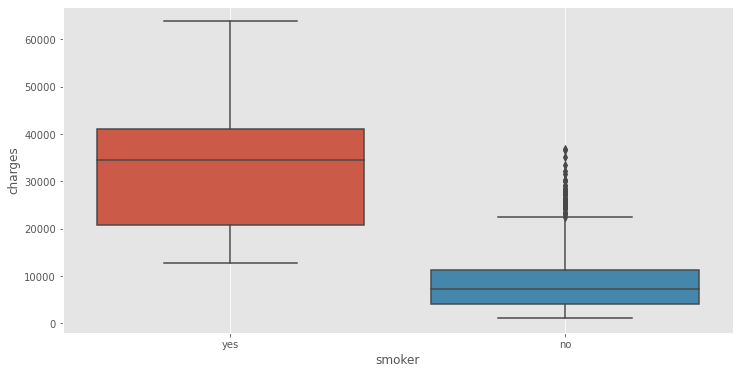

In [90]:
sns.boxplot(x="smoker", y="charges", data=df)
plt.grid()
plt.show()

In [91]:
if p <alpha :
    print("P-value is less than alpha")
    print(str(p)+" < "+ str(alpha))
    print("Null hypothesis is rejected")
    
else:
    print("P-value is greater than alpha")
    print(str(p)+" > "+ str(alpha))
    print("Null hypothesis is accepted")

P-value is less than alpha
2.94473222335849e-103 < 0.05
Null hypothesis is rejected


**Conclusion: Charges for smoker are higher than non-smoker**

# Question 4 Charges for those with BMI>25 are higher than charges with BMI<25

$$ \mu_1 = \text{Charges for bmi higher than 25} $$
$$ \mu_2 = \text{Charges for bmi less than 25}$$
$$H_0: \mu_1 \leq  \mu_2 \text{ Charges for those with BMI>25 is less or equal than charges with BMI<25}$$
$$H_1: \mu_1 >  \mu_2 \text{ Charges for those with BMI>25 is higher than charges with BMI<25}$$

In [81]:
df_bmi = df.copy()
df_bmi['bmi_check'] = df['bmi']>25

In [93]:
df_bmi['bmi_check'].value_counts()

True     1091
False     247
Name: bmi_check, dtype: int64

The hypothesis test are done using T-test considering that the standard deviation to the population are not known and only the samples are given in a form of a dataset. 
Understanding the number of samples are not equal, Welcht T-Test rather than the usual Student T-Test.

In [79]:
df_bmi25 = df[df['bmi']>=25]
df_lessbmi25 = df[df['bmi']<25]

In [80]:
alpha=0.05
t, p = stat.ttest_ind(df_bmi25['charges'], df_lessbmi25['charges'], equal_var=False, alternative="greater")
print("P-value =" + str(p))

P-value =2.633329709073052e-09


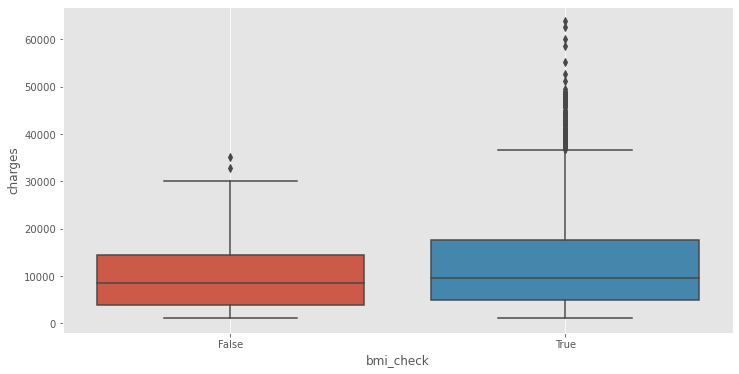

In [82]:
sns.boxplot(x="bmi_check", y="charges", data=df_bmi)
plt.grid()
plt.show()

In [83]:
if p <alpha :
    print("P-value is less than alpha")
    print(str(p)+" < "+ str(alpha))
    print("Null hypothesis is rejected")
    
else:
    print("P-value is greater than alpha")
    print(str(p)+" > "+ str(alpha))
    print("Null hypothesis is accepted")

P-value is less than alpha
2.633329709073052e-09 < 0.05
Null hypothesis is rejected


**Conclusion: Charges for those with BMI>25 are higher than BMI<25**

# Question 5: Charges for men are higher than women

$$ \mu_1 = \text{Charges for men} $$
$$ \mu_2 = \text{Charges forwomen}$$
$$H_0: \mu_1 \leq  \mu_2 \text{ Charges for men less or equal than charges for women}$$
$$H_1: \mu_1 >  \mu_2 \text{ Charges for men is higher than charges for women}$$

In [84]:
df_male = df[df['sex']=='male']
df_female = df[df['sex']=='female']

In [94]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

The hypothesis test are done using T-test considering that the standard deviation to the population are not known and only the samples are given in a form of a dataset. 
Understanding the number of samples are not equal, Welcht T-Test rather than the usual Student T-Test.

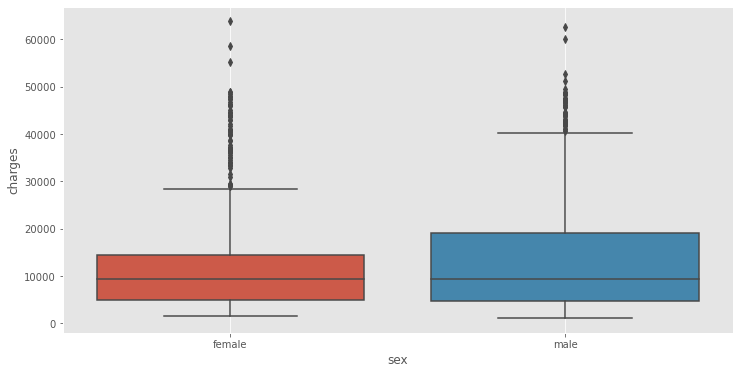

In [85]:
sns.boxplot(x="sex", y="charges", data=df)
plt.grid()
plt.show()

In [97]:
alpha=0.05
t, p = stat.ttest_ind(df_male['charges'], df_female['charges'], equal_var=False)
print("P-value =" + str(p))

P-value =0.035841014956016645


In [98]:
if p <alpha :
    print("P-value is less than alpha")
    print(str(p)+" < "+ str(alpha))
    print("Null hypothesis is rejected")
    
else:
    print("P-value is greater than alpha")
    print(str(p)+" > "+ str(alpha))
    print("Null hypothesis is accepted")

P-value is less than alpha
0.035841014956016645 < 0.05
Null hypothesis is rejected


**Conclusion: Charges for men are higher than women**